Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from pandas_datareader import data as pdr

df_invoice = pd.read_csv('data/fct_invoice.csv')
df_customer = pd.read_json('data/dim_customer.json')

In [3]:
df_invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df_customer

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


Question #1

In [5]:
df_customer.shape

(5191, 5)

Question #2

In [6]:
df_invoice['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

Question #3

In [7]:
df_invoice['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

Question #4

In [16]:
df_invoice['total_sales'] = df_invoice['price'] * df_invoice['quantity']
category_sales=df_invoice.groupby('category')['total_sales'].sum()
category_sales.head(3)

category
Books        8.345529e+05
Clothing     1.139968e+08
Cosmetics    6.792863e+06
Name: total_sales, dtype: float64

Question #5

In [19]:
df_customer.rename(columns={'id':'customer_id'}, inplace=True)
df_merge = df_invoice.merge(df_customer, on='customer_id')
df_over45=df_merge[df_merge['age']>45]
df_over45['total_sales'].sum()

82039768.15

Question #6

/var/folders/hp/nv23rhxn115_x5fplxmvv0440000gn/T/ipykernel_7856/3745124646.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'])


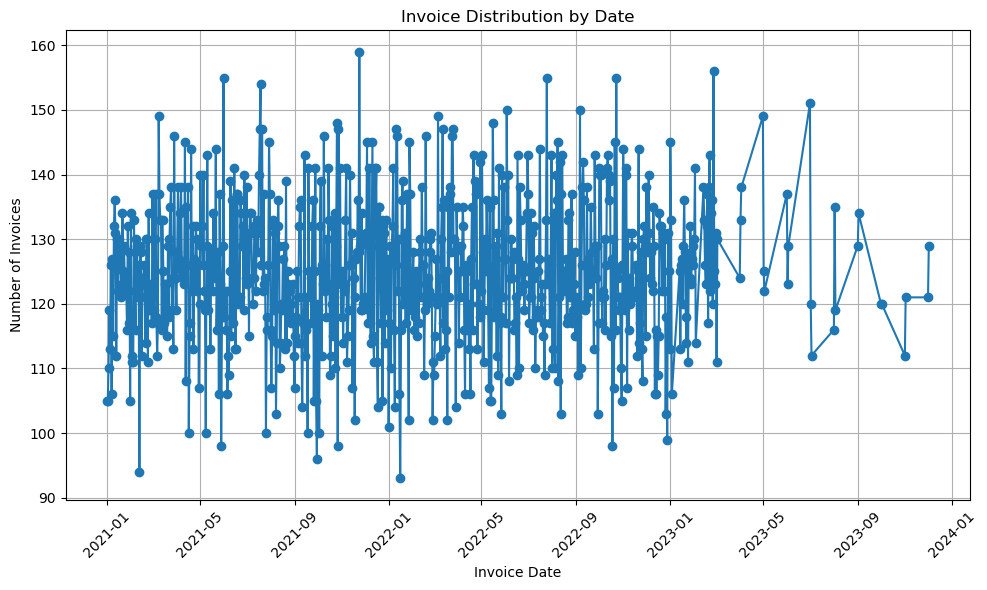

In [20]:
df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'], dayfirst=True)
invoice_dates = df_invoice.groupby('invoice_date').size()

plt.figure(figsize=(10, 6))
plt.plot(invoice_dates.index, invoice_dates.values, marker='o', linestyle='-')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.title('Invoice Distribution by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()